## Filtering the data:

The dataset I will be using: [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

Data Description: [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)


In [1]:
import pandas as pd
import numpy as np
import pathlib  # We use pathlib.Path for cross-platform paths

In [2]:
### Constants
_DATA_PATH = pathlib.Path("../data") / "lab-1"  # Note functionality of division operator (__truediv__) on Path objects
_DATA_PATH

WindowsPath('../data/lab-1')

In [3]:
## Download data, if you don't already have it
import kaggle
kaggle.api.authenticate()
kaggle.api.competition_download_files('house-prices-advanced-regression-techniques', path=_DATA_PATH)

In [4]:
# %%bash  # May need to edit this if you're on windows, just unzip to data dir
# unzip ../data/lab-1/house-prices-advanced-regression-techniques.zip -d ../data/lab-1
# **Unzipped and moved files into data/lab-1 directory manually.

In [5]:
# read the dataset
df = pd.read_csv(_DATA_PATH/'train.csv', index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# show all the columns
pd.set_option('display.max_columns', None)

In [7]:
# see the first 5 records
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# are there any duplicates?
df.duplicated().sum()

0

In [9]:
# do we have any duplicates in Id? What about Neighborhood?
df.duplicated(subset=['Neighborhood']).sum()

1435

In [10]:
# remove duplicates in Neighborhood by keeping only the first record for each
# Neighborhood and view the new dataset
# do not over-write the dataframe
df.drop_duplicates(subset=['Neighborhood'], keep='first').Neighborhood

Id
1      CollgCr
2      Veenker
4      Crawfor
5      NoRidge
6      Mitchel
7      Somerst
8       NWAmes
9      OldTown
10     BrkSide
11      Sawyer
12     NridgHt
15       NAmes
19     SawyerW
22      IDOTRR
24     MeadowV
40     Edwards
42      Timber
51     Gilbert
59     StoneBr
70     ClearCr
127    NPkVill
220    Blmngtn
226     BrDale
268      SWISU
600    Blueste
Name: Neighborhood, dtype: object

In [11]:
# Alt, we can just use unique() again...
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [12]:
assert [x in df['Neighborhood'].unique() for x in df.drop_duplicates(subset=['Neighborhood'], keep='first').Neighborhood]

In [13]:
# How many listings do we have?
len(df)

1460

In [14]:
# How many columns do we have?
len(df.columns)

80

In [15]:
# use .shape to see the column and rows length
print("The data size is : {} ".format(df.shape))

The data size is : (1460, 80) 


In [16]:
# take a look at the datatypes
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [17]:
# get some stats in
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
# describe only the SalePrice
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [19]:
# Convert 'YearBuilt' type to int
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')

In [20]:
# which are the oldest houses?
df.sort_values('YearBuilt').head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,780,780,GasA,Gd,N,SBrkr,780,240,0,1020,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000


In [21]:
# take a look at only one neighborhood (NoRidge)
df[df.Neighborhood == 'NoRidge']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000
227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,290.0,Gd,TA,PConc,Gd,TA,No,GLQ,565,Unf,0,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0,2520,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1995.0,RFn,3,721,TA,TA,Y,224,114,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml,290000
232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,689,Unf,0,773,1462,GasA,Ex,Y,SBrkr,1490,1304,0,2794,1,0,2,1,4,1,Ex,9,Typ,1,TA,Attchd,1995.0,Fin,3,810,TA,TA,Y,0,146,202,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
273,60,RL,92.0,11764,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1999,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,348.0,Gd,TA,PConc,Gd,TA,No,GLQ,524,Unf,0,628,1152,GasA,Ex,Y,SBrkr,1164,1106,0,2270,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1999.0,Fin,3,671,TA,TA,Y,132,57,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,290000
319,60,RL,90.0,9900,Pave,NaN,Reg,Low,AllPub,Inside,Mod,NoRidge,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,256.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,987,Unf,0,360,1347,GasA,Ex,Y,SBrkr,1372,1274,0,2646,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1993.0,RFn,3,656,TA,TA,Y,340,60,144,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,260000
360,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,530.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956,Unf,0,130,1086,GasA,Ex,Y,SBrkr,1086,838,0,1924,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,RFn,2,592,TA,TA,Y,208,75,0,0,374,0,NaN,NaN,NaN,0,6,2006,WD,Normal,280000
404,60,RL,93.0,12090,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,650.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1141,1141,GasA,Gd,Y,SBrkr,1165,1098,0,2263,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,1998.0,Fin,2,420,TA,TA,Y,144,123,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,258000
424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,473.0,Gd,TA,PConc,Gd,TA,No,GLQ,986,Unf,0,484,1470,GasA,Gd,Y,SBrkr,1470,1160,0,2630,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1998.0,Fin,3,696,TA,TA,Y,0,66,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000


In [22]:
# take a look at only another neighborhood (NoRidge)
df[df.Neighborhood == 'Crawfor']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,184.0,TA,Gd,CBlock,Gd,TA,Mn,ALQ,35,Rec,869,905,1809,GasA,TA,Y,SBrkr,2259,0,0,2259,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Basment,1953.0,Unf,2,450,TA,TA,Y,166,120,192,0,0,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
115,70,RL,61.0,7259,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,6,8,1945,2002,Gambrel,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,774,LwQ,150,104,1028,GasA,Ex,Y,SBrkr,1436,884,0,2320,1,0,2,1,3,1,Gd,9,Typ,1,TA,Detchd,1945.0,Unf,1,180,TA,TA,Y,224,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,259500
182,70,RL,54.0,7588,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,6,1920,1950,Gable,CompShg,Stucco,Stucco,NaN,0.0,TA,TA,BrkTil,Fa,TA,No,LwQ,352,Unf,0,441,793,GasA,Gd,Y,SBrkr,901,901,0,1802,0,0,1,1,4,1,TA,9,Typ,1,Gd,Detchd,1920.0,Unf,1,216,Fa,TA,Y,0,0,40,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,200100
191,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,8,1932,1994,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,Gd,Gd,No,Rec,297,Unf,0,556,853,GasA,TA,Y,SBrkr,1549,1178,0,2727,0,0,2,1,3,1,Gd,10,Maj1,2,TA,Detchd,1932.0,Unf,2,440,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,315000
219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,9,1939,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,No,BLQ,341,Unf,0,457,798,GasA,Ex,Y,SBrkr,1137,817,0,1954,0,1,1,1,3,1,Gd,8,Typ,2,TA,Attchd,1939.0,Unf,2,431,TA,TA,Y,0,119,150,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
252,120,RM,44.0,4750,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,481.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1573,Unf,0,0,1573,GasA,Ex,Y,SBrkr,1625,0,0,1625,1,1,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2006.0,Fin,2,538,TA,TA,Y,123,0,0,0,153,0,NaN,NaN,NaN,0,12,2007,WD,Family,235000
300,20,RL,80.0,14000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,8,1950,2004,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,1092,1092,GasA,Ex,Y,SBrkr,1152,0,0,1152,0,1,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1950.0,Unf,1,300,TA,TA,Y,0,36,0,0,0,0,NaN,GdPrv,NaN,0,8,2009,WD,Family,158500


In [23]:
# how many houses are there in this neighborhood?
len(df[df.Neighborhood == 'Crawfor'])

51

In [24]:
# first house that was built in NoRidge neighborhood
df[df.Neighborhood == 'NoRidge'].sort_values('YearBuilt').head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1313,60,RL,NaN,9572,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1990,1990,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,336.0,Gd,TA,PConc,Ex,TA,No,GLQ,482,Unf,0,971,1453,GasA,Ex,Y,SBrkr,1453,1357,0,2810,0,0,2,1,4,1,Gd,9,Typ,1,Ex,Attchd,1990.0,RFn,2,750,Gd,Gd,Y,500,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000


In [25]:
# first house that was built in NoRidge neighborhood
df[df.Neighborhood == 'NoRidge'].sort_values('YearBuilt', ascending=False).head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
# Let's take a look at the NoRidge neighborhood for houses that
# were remodelled after 1998
df_noridge = df[df.Neighborhood == 'NoRidge']
df_noridge[df_noridge.YearRemodAdd >= 1998]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
273,60,RL,92.0,11764,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1999,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,348.0,Gd,TA,PConc,Gd,TA,No,GLQ,524,Unf,0,628,1152,GasA,Ex,Y,SBrkr,1164,1106,0,2270,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1999.0,Fin,3,671,TA,TA,Y,132,57,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,290000
360,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,530.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956,Unf,0,130,1086,GasA,Ex,Y,SBrkr,1086,838,0,1924,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,RFn,2,592,TA,TA,Y,208,75,0,0,374,0,NaN,NaN,NaN,0,6,2006,WD,Normal,280000
404,60,RL,93.0,12090,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,650.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1141,1141,GasA,Gd,Y,SBrkr,1165,1098,0,2263,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,1998.0,Fin,2,420,TA,TA,Y,144,123,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,258000
424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,473.0,Gd,TA,PConc,Gd,TA,No,GLQ,986,Unf,0,484,1470,GasA,Gd,Y,SBrkr,1470,1160,0,2630,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1998.0,Fin,3,696,TA,TA,Y,0,66,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
542,60,RL,NaN,11000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,969,969,GasA,Ex,Y,SBrkr,997,1288,0,2285,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,3,648,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,248000
565,60,RL,NaN,13346,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1992,2000,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,728,Unf,0,367,1095,GasA,Ex,Y,SBrkr,1166,1129,0,2295,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,RFn,2,590,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,268000
662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361,Rec,180,88,1629,GasA,Ex,Y,SBrkr,1686,762,0,2448,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,RFn,3,711,TA,TA,Y,517,76,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
685,60,RL,58.0,16770,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,30.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1195,1195,GasA,Gd,Y,SBrkr,1195,644,0,1839,0,0,2,1,4,1,TA,7,Typ,0,NaN,Attchd,1998.0,Fin,2,486,TA,TA,Y,0,81,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,221000


In [27]:
# another way of doing this?
df[(df.Neighborhood == 'NoRidge') & (df.YearRemodAdd >= 1998)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
273,60,RL,92.0,11764,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1999,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,348.0,Gd,TA,PConc,Gd,TA,No,GLQ,524,Unf,0,628,1152,GasA,Ex,Y,SBrkr,1164,1106,0,2270,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1999.0,Fin,3,671,TA,TA,Y,132,57,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,290000
360,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,530.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956,Unf,0,130,1086,GasA,Ex,Y,SBrkr,1086,838,0,1924,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,RFn,2,592,TA,TA,Y,208,75,0,0,374,0,NaN,NaN,NaN,0,6,2006,WD,Normal,280000
404,60,RL,93.0,12090,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,650.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1141,1141,GasA,Gd,Y,SBrkr,1165,1098,0,2263,0,0,2,1,4,1,Gd,10,Typ,1,TA,BuiltIn,1998.0,Fin,2,420,TA,TA,Y,144,123,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,258000
424,60,RL,80.0,9200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,473.0,Gd,TA,PConc,Gd,TA,No,GLQ,986,Unf,0,484,1470,GasA,Gd,Y,SBrkr,1470,1160,0,2630,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1998.0,Fin,3,696,TA,TA,Y,0,66,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,315000
542,60,RL,NaN,11000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,969,969,GasA,Ex,Y,SBrkr,997,1288,0,2285,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,3,648,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,248000
565,60,RL,NaN,13346,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1992,2000,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,728,Unf,0,367,1095,GasA,Ex,Y,SBrkr,1166,1129,0,2295,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1992.0,RFn,2,590,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,268000
662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361,Rec,180,88,1629,GasA,Ex,Y,SBrkr,1686,762,0,2448,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,RFn,3,711,TA,TA,Y,517,76,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
685,60,RL,58.0,16770,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,30.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1195,1195,GasA,Gd,Y,SBrkr,1195,644,0,1839,0,0,2,1,4,1,TA,7,Typ,0,NaN,Attchd,1998.0,Fin,2,486,TA,TA,Y,0,81,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,221000


In [28]:
# How many houses were built from 1950 through 1959?
len(df[(df.YearBuilt >= 1950) & (df.YearBuilt <= 1959)])

167

In [29]:
# another way of doing this?
len(df[df.YearBuilt // 10 == 195])

167

In [30]:
# how many fireplaces can a house have?
df.Fireplaces.unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
# how many types of kitchen quality do we have?
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [32]:
# how many types of heating do we have?
df.Heating.unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [33]:
# how to view only houses that are heated by gas?
df[df.Heating.str.contains('Gas')].Heating

Id
1       GasA
2       GasA
3       GasA
4       GasA
5       GasA
        ... 
1456    GasA
1457    GasA
1458    GasA
1459    GasA
1460    GasA
Name: Heating, Length: 1446, dtype: object

In [34]:
# using lambda and a function change 2Story to 2Storey and 1Story to 1Storey

# see what the values are in this column
print('before modification values are: ',  df.HouseStyle.unique())

# create a function that can change this value
def change_spelling(style_name):
    """
    changes the spelling of story to storey in a string
    input: string
    output: modified name of the style
    """
    if style_name == '2Storey': return '2Story'
    elif style_name == '1Storey': return '1Story'
    else: return style_name

# apply the changes on HouseStyle
df.loc[:, 'HouseStyle'] = df.loc[:, 'HouseStyle'].apply(lambda x: change_spelling(x))

# print the new values
print('after the modification values are: ',  df.HouseStyle.unique())

before modification values are:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
after the modification values are:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


## Your turn...

Dataset: [link](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

In [35]:
# Optional download using kaggle api, can do manually too
dataset_name = "harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows"
kaggle.api.dataset_download_files(dataset_name, path=_DATA_PATH, unzip=True)

In [36]:
# Read the dataset
df = pd.read_csv(_DATA_PATH/'imdb_top_1000.csv')


In [37]:
# see the first few records
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [38]:
# How many movies are there?
len(df)

1000

In [39]:
# How many columns do we have?
len(df.columns)

16

In [40]:
# Are there any duplicates?
df.duplicated().sum()

0

In [41]:
# Are there any duplicates in the Released_Year column?
df.duplicated(subset=['Released_Year']).sum()

900

In [42]:
# Take a look at the datatypes
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [43]:
# Convert 'Released_Year' to int
#df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'] = pd.to_numeric(df['Released_Year'], downcast='integer', errors='coerce')


# Convert 'Gross' to float
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Now, you can check the data types of your DataFrame
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [44]:
# take a look at the record for Fight Club
df[df.Series_Title == 'Fight Club']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999.0,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,NaN


In [45]:
# which are the movies released after the year 2000?
df[df.Released_Year >= 2000]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,NaN
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003.0,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,NaN
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010.0,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,NaN
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001.0,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,NaN
13,https://m.media-amazon.com/images/M/MV5BZGMxZT...,The Lord of the Rings: The Two Towers,2002.0,UA,179 min,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,https://m.media-amazon.com/images/M/MV5BMTAxMD...,The Others,2001.0,PG-13,101 min,"Horror, Mystery, Thriller",7.6,A woman who lives in her darkened old family h...,74.0,Alejandro Amenábar,Nicole Kidman,Christopher Eccleston,Fionnula Flanagan,Alakina Mann,337651,NaN
949,https://m.media-amazon.com/images/M/MV5BYjg5ZD...,Blow,2001.0,R,124 min,"Biography, Crime, Drama",7.6,"The story of how George Jung, along with the M...",52.0,Ted Demme,Johnny Depp,Penélope Cruz,Franka Potente,Rachel Griffiths,240714,NaN
950,https://m.media-amazon.com/images/M/MV5BYWFlY2...,Enemy at the Gates,2001.0,A,131 min,"Drama, History, War",7.6,A Russian and a German sniper play a game of c...,53.0,Jean-Jacques Annaud,Jude Law,Ed Harris,Joseph Fiennes,Rachel Weisz,243729,NaN
951,https://m.media-amazon.com/images/M/MV5BZTI3Yz...,Minority Report,2002.0,A,145 min,"Action, Crime, Mystery",7.6,In a future where a special police unit is abl...,80.0,Steven Spielberg,Tom Cruise,Colin Farrell,Samantha Morton,Max von Sydow,508417,NaN


In [46]:
# which are the 2 most famous ones? (look at the number of votes!)
df.sort_values(by='No_of_Votes', ascending=False).head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,NaN
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,NaN


In [47]:
# look at the oldest movie in this dataset. How to see the latest?

# Figured out how from: https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan

df[df['Released_Year']==df['Released_Year'].max()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020.0,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020.0,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
205,https://m.media-amazon.com/images/M/MV5BZGE1MD...,Soul,2020.0,U,100 min,"Animation, Adventure, Comedy",8.1,"After landing the gig of a lifetime, a New Yor...",83.0,Pete Docter,Kemp Powers,Jamie Foxx,Tina Fey,Graham Norton,159171,NaN
464,https://m.media-amazon.com/images/M/MV5BNmI0MT...,Dil Bechara,2020.0,UA,101 min,"Comedy, Drama, Romance",7.9,The emotional journey of two hopelessly in lov...,NaN,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid,Saswata Chatterjee,111478,NaN
612,https://m.media-amazon.com/images/M/MV5BYjYzOG...,The Trial of the Chicago 7,2020.0,R,129 min,"Drama, History, Thriller",7.8,The story of 7 people on trial stemming from v...,77.0,Aaron Sorkin,Eddie Redmayne,Alex Sharp,Sacha Baron Cohen,Jeremy Strong,89896,NaN
613,https://m.media-amazon.com/images/M/MV5BOTNjM2...,Druk,2020.0,NaN,117 min,"Comedy, Drama",7.8,"Four friends, all high school teachers, test a...",81.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Magnus Millang,Lars Ranthe,33931,NaN


In [48]:
# Group the movies based on the first actor and sort by the number of movies they have played in

# Link: https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/
df_actor = df['Star1'].value_counts()
df_actor

##df_movies.groupby('Star1').size().sort_values()

Star1
Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
                   ..
Preity Zinta        1
Javier Bardem       1
Ki-duk Kim          1
Vladimir Garin      1
Robert Donat        1
Name: count, Length: 660, dtype: int64

In [49]:
# What are the Certificate types?
df.Certificate.unique() ##from solutions

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [56]:
# Which movie descriptions have NASA in their Overview?
df[df.Overview.str.contains('NASA')] ##From solutions

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
575,https://m.media-amazon.com/images/M/MV5BMzg2Mz...,Hidden Figures,2016.0,UA,127 min,"Biography, Drama, History",7.8,The story of a team of female African-American...,74.0,Theodore Melfi,Taraji P. Henson,Octavia Spencer,Janelle Monáe,Kevin Costner,200876,NaN
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,NaN,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,NaN


In [57]:
# Create a function that changes "The Dark Knight" movie name to "Batman" in the Series_Title

def change_spelling(name):
    """
    changing name of The Dark Knight to Batman
    """
    if name == "The Dark Knight": return "Batman"   ##From solutions
    else: return name


# apply the changes on Series_Title
df.loc[:, 'Series_Title'] = df.loc[:, 'Series_Title'].apply(lambda x: change_spelling(x))


In [58]:
# Print the 'Series_Title' in df_movies to see the value has changed
df.loc[:, 'Series_Title']

0      The Shawshank Redemption
1                 The Godfather
2                        Batman
3        The Godfather: Part II
4                  12 Angry Men
                 ...           
995      Breakfast at Tiffany's
996                       Giant
997       From Here to Eternity
998                    Lifeboat
999                The 39 Steps
Name: Series_Title, Length: 1000, dtype: object

In [53]:
## First half of lab 1 ends here. We will pick up with the rest of this notebook on Jan. 26

### Visualization

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
## reimport the house data stuff
df_house = pd.read_csv(_DATA_PATH/'train.csv', index_col="Id")
df_house.head()

# data manipulation
# create a column called decade that has the decade in which the house was built
df_house.loc[:, 'Decade'] = df_house.YearBuilt // 10 * 10
df_house['Decade']
##df_house

Id
1       2000
2       1970
3       2000
4       1910
5       2000
        ... 
1456    1990
1457    1970
1458    1940
1459    1950
1460    1960
Name: Decade, Length: 1460, dtype: int64

<Axes: xlabel='Decade'>

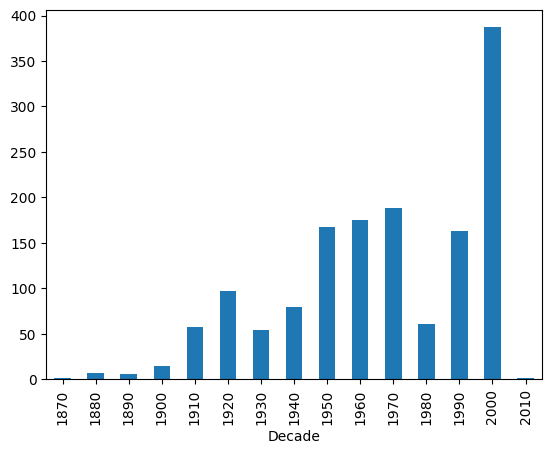

In [67]:
# Using groupby(), plot the number of houses built each decade

df_house.groupby(by='Decade').size().plot(kind='bar')

<Axes: xlabel='Decade'>

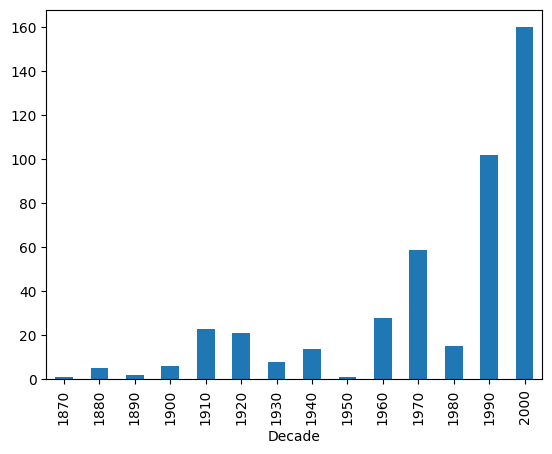

In [73]:
# Using groupby(), plot the number of 2Storey houses built each decade

df_2storey = df_house[df_house['HouseStyle']=='2Story'].reset_index(drop=True) ##reloaded dataset, hence 2story and not 2storey
df_2storey
df_2storey.groupby(by='Decade').size().plot(kind='bar')

### df.corr()

The correlation matrix is a square matrix that displays the pairwise correlations between all numeric columns in the DataFrame. It is a valuable tool for understanding the relationships and dependencies between different variables in your dataset.

The correlation coefficient, which ranges from -1 to 1, quantifies the strength and direction of the linear relationship between two variables:

A value of 1 indicates a perfect positive linear correlation, meaning that as one variable increases, the other also increases proportionally.
A value of -1 indicates a perfect negative linear correlation, meaning that as one variable increases, the other decreases proportionally.
A value close to 0 indicates a weak or no linear correlation between the variables.

<Axes: >

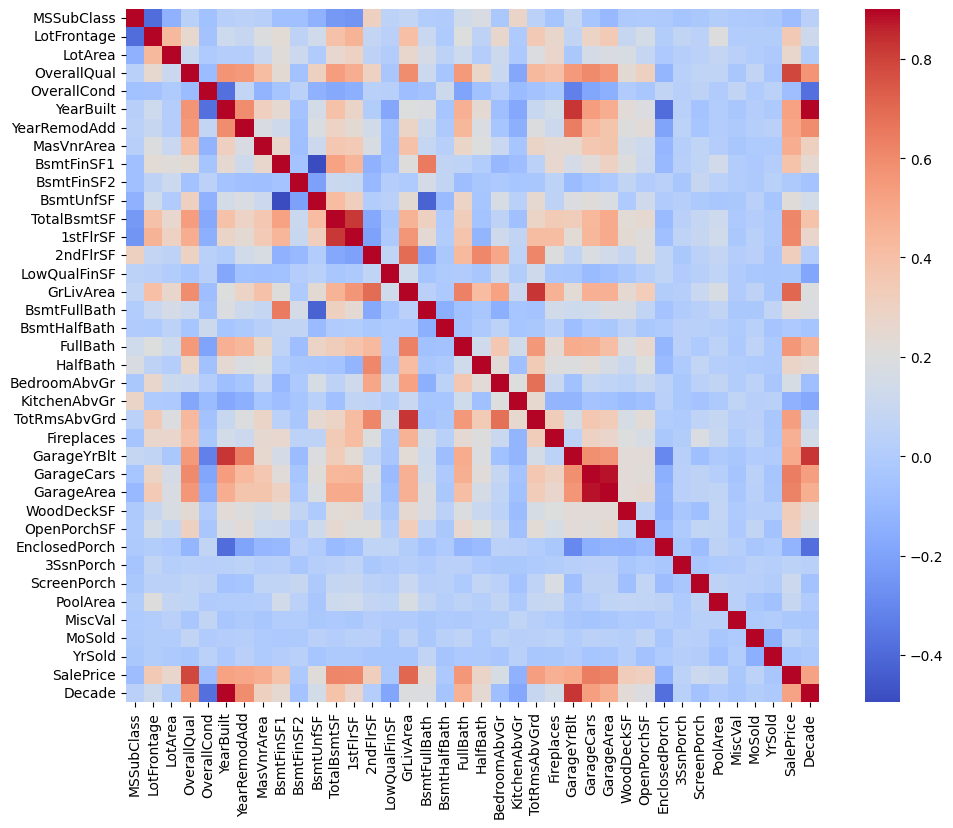

In [75]:
# Correlation map to see how features are correlated with SalePrice
corrmat = df_house.corr(numeric_only=True) ##can only work with numbers, cannot convert string to number in this func
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')

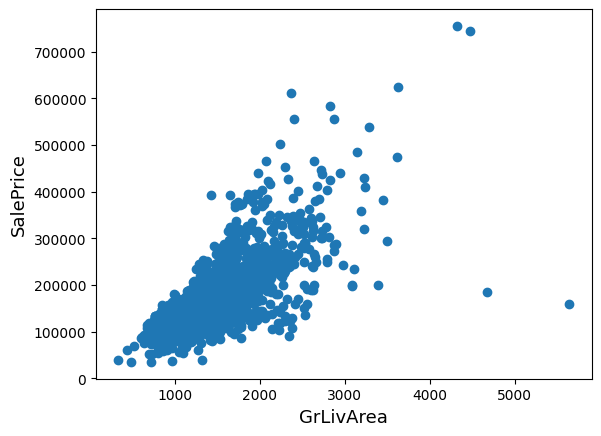

In [76]:
# plot GrLivArea against SalePrice
# do you see anything out of the ordinary?
fig, ax = plt.subplots()
ax.scatter(x = df_house['GrLivArea'], y = df_house['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

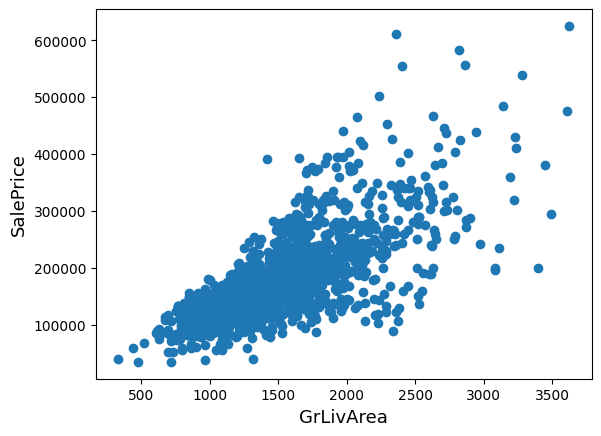

In [77]:
#Deleting outliers
df_house = df_house.drop(df_house[df_house['GrLivArea']>4000].index)

fig, ax = plt.subplots()
ax.scatter(df_house['GrLivArea'], df_house['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

 ### displot (short for "distribution plot")

 This is a function used to visualize the univariate distribution of a dataset. It allows you to plot the distribution of a single continuous variable, providing insights into its underlying data distribution, including the shape, central tendency, and spread of the data.

 **data** is the data you want to visualize. It can be a Pandas Series, NumPy array, or a list containing your dataset.

**bins** (optional) controls the number of bins or intervals into which the data is divided for the histogram. More bins provide finer granularity.

**kde** (optional) stands for "Kernel Density Estimation" and is a way to estimate the probability density function of the data. Setting it to True adds a smoothed curve to the plot, which can provide additional insights into the data's distribution.


C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


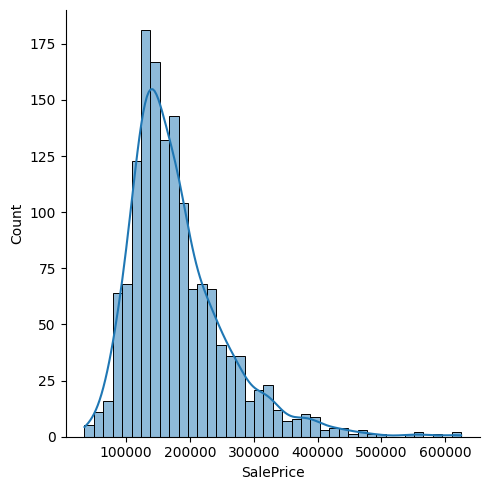

In [78]:
# let's make a histogram for sales
sns.displot(df_house['SalePrice'], kde=True)

The catplot function is a powerful and flexible way to create categorical plots. Categorical plots are used to visualize the distribution of one variable within different categories or the relationship between two categorical variables.

C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

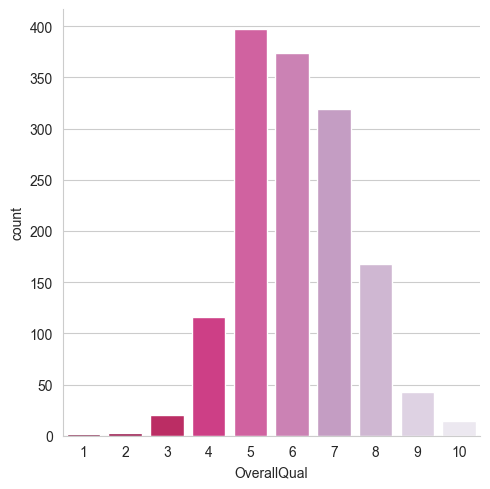

In [79]:
feature = 'OverallQual' # add the name of the column to this list - 'MoSold'

sns.set_style('whitegrid')
sns.catplot(x=feature, kind="count", palette="PuRd_r", data=df_house)

### Your Turn

In [85]:
# Create a column called decade that has the decade in which the movie was released?
df.loc[:, 'Decade'] = df.Released_Year // 10 * 10
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,NaN,1990.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,NaN,1970.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,Batman,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,NaN,2000.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,NaN,1970.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,NaN,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,1960.0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,1950.0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953.0,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,NaN,1950.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,1940.0


<Axes: xlabel='Decade'>

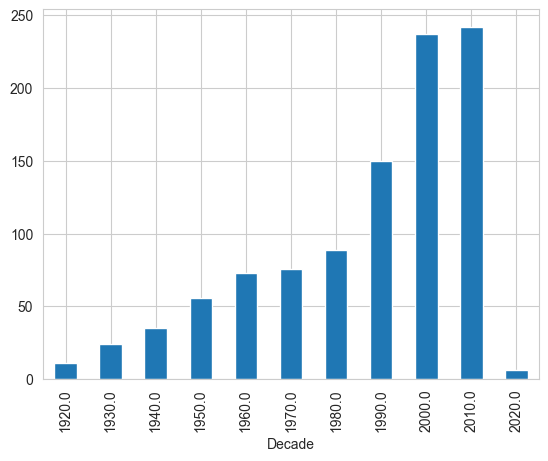

In [86]:
# Using groupby(), plot the number of movies that have been made each decade in the history of cinema.
df.groupby(by='Decade').size().plot(kind='bar')


<Axes: >

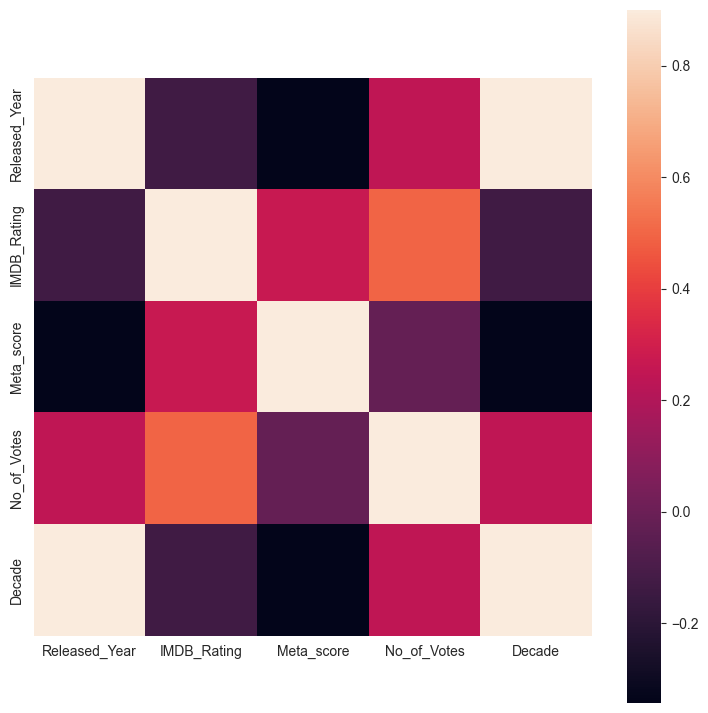

In [91]:
# Build the correlation matrix and plot it with seaborn to see how features are correlated with SalePrice
corrmat = df.drop(columns='Gross').corr(numeric_only=True)
plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='rocket')

C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jinxx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


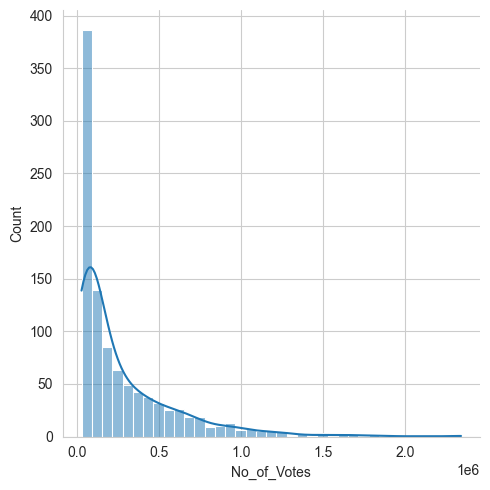

In [92]:
# Provide the histogram of No_of_Votes
sns.displot(df['No_of_Votes'], kde=True)

 ## Missing Values
 When handling these null values we have to divide them into three categories. [Reference](https://cjasn.asnjournals.org/content/9/7/1328.abstract)


![pic](https://github.com/mitramir55/teaching_material/blob/master/missing%20values.png?raw=true)


**Missing Completely at Random (MCAR):** This means that there is no relationship between the missing values themselves and any other feature or observation in the dataset. These are just missing randomly and without any pattern. Like when a questionnaire is lost or some parts of a survey paper are soaked and you cannot read what it's saying. Therefore we can simply ignore them.

**Missing at Random (MAR):** Means there is a pattern and relationship between the missing values and the observed values, like when the survey is about mental and physical health, male participants are less likely to know their waist circumference or boob size. We can again ignore these missing values and drop the feature or examples from our dataset. In this case we say that missing values are only related to the observed features (gender).

**Missing Not at Random (MNAR):** This is a missing value that cannot and should not be ignored. We have to model and see when were the values missing and what was the reason for it. For instance, men might not answer questions about depression because of their depression. In this case we say that the missing values are related to themselves (depression) as well as to the observed features (gender).

In [ ]:
# How to see the total number of null values?
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Released_Year      0
Length: 82, dtype: int64

In [ ]:
# Which one has the most null values?
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
Released_Year       0
Length: 82, dtype: int64

In [ ]:
# A function for an interpretable visualization of nulls
def detect_nulls(df, n=30):
    """
    A function for viewing the null values present in the dataset
    input: takes in a dataframe and the n for the n most empty columns
    output: a dataframe with the count and precentage of nulls
    """
    df_nulls = df.isnull().sum()
    df_nulls = pd.DataFrame(np.c_[df_nulls, np.round(df_nulls/len(df) *100, 2)],
                                    columns=['count', 'percentage'], index = df_nulls.index)
    df_nulls.sort_values(by = df_nulls.columns[0], ascending=False, inplace = True)

    df_nulls = df_nulls.loc[[i for i in df_nulls.index if (df_nulls.loc[i, :] != 0).any() & (i not in ['SalePrice'])]]

    print('How many features had at least one null value?', len(df_nulls))
    print('{} most empty features of all:'.format(df_nulls.index[0]))
    return df_nulls[:n]

In [ ]:
detect_nulls(df, n=40)

How many features had at least one null value? 19
PoolQC most empty features of all:


,count,percentage
PoolQC,1453.0,99.52
MiscFeature,1406.0,96.30
Alley,1369.0,93.77
Fence,1179.0,80.75
FireplaceQu,690.0,47.26
LotFrontage,259.0,17.74
GarageYrBlt,81.0,5.55
GarageCond,81.0,5.55
GarageType,81.0,5.55
GarageFinish,81.0,5.55


In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,decade
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Storey,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,None,0,2,2008,WD,Normal,208500,2000
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Storey,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,None,0,5,2007,WD,Normal,181500,1970
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Storey,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,None,0,9,2008,WD,Normal,223500,2000
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Storey,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,None,0,2,2006,WD,Abnorml,140000,1910
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Storey,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,None,0,12,2008,WD,Normal,250000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Storey,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,None,None,0,8,2007,WD,Normal,175000,1990
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Storey,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,None,0,2,2010,WD,Normal,210000,1970
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Storey,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1940
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Storey,5,6,1950,1996,Hi

In [ ]:
# fill the null values in PoolQC and MiscFeature with None
df["PoolQC"] = df["PoolQC"].fillna("None")

In [ ]:
# Write a for loop to fill the nulls values in
# 'MiscFeature', 'Fence', 'Alley', 'FireplaceQu'
# with None
for col in ('MiscFeature', 'Fence', 'Alley', 'FireplaceQu'):
    df[col] = df[col].fillna("None")


### Stripplot

x='category_column' specifies the categorical variable to be plotted on the x-axis. This is typically a column containing category labels.
y='numeric_column' specifies the numeric variable to be plotted on the y-axis. This is the data you want to visualize within each category.
data=data specifies the DataFrame containing your data.

### features to inspect -> 'PoolQC', 'MiscFeature', 'Alley'


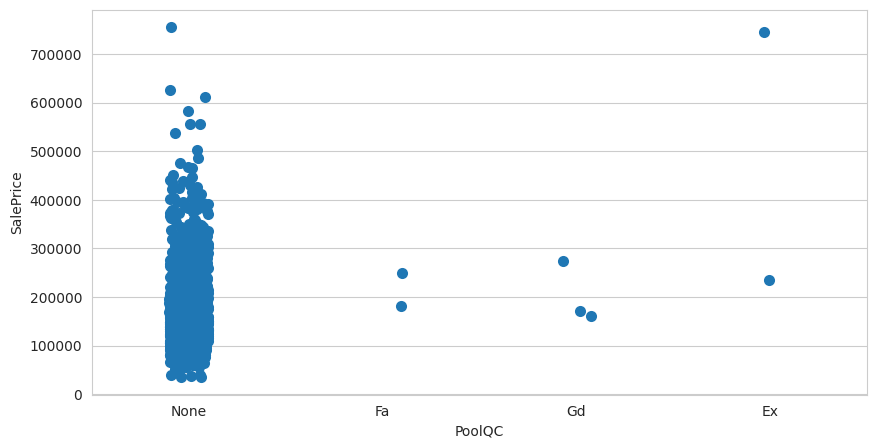

In [ ]:
# create a seaborn plot for the number of nulls
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.stripplot(x='PoolQC', y="SalePrice", data=df,
                    order=["None", "Fa", "Gd", "Ex"], size = 8)

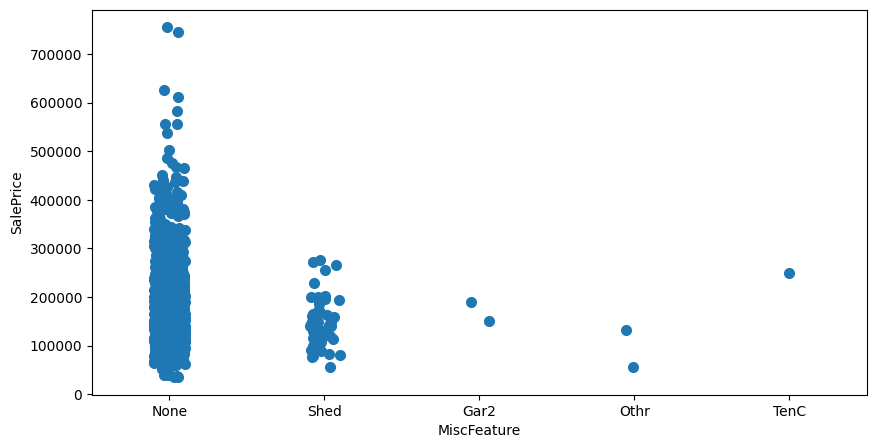

In [ ]:
# create a seaborn plot for the number of nulls
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.stripplot(x='MiscFeature', y="SalePrice", data=df, size = 8)

In [ ]:
# Write a for loop to fill the nulls values in
# 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
# with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [ ]:
# some have to be filled with zero
# 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [ ]:
# what should be done for MSZoning (The general zoning classification)?


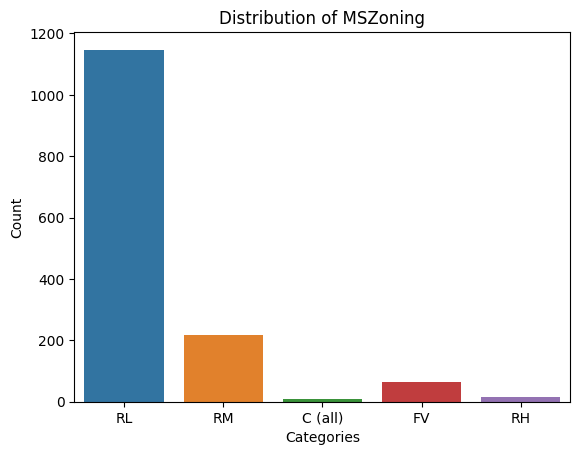

In [ ]:
# let's plot the distribution

# Create a count plot
sns.countplot(data=df, x='MSZoning')

# Optional: Customize the plot
plt.title('Distribution of MSZoning')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
# take a look at the most frequent value
df['MSZoning'].mode()[0]

'RL'

In [ ]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [ ]:
# so how to drop a column?
df.drop(columns=['PoolQC'], inplace=True)

In [ ]:
# look at the Electrical column and see what can be done
df.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [ ]:
# see the values in this column
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
# drop the record with null in it
df.dropna(subset=['Electrical'], inplace=True)

In [ ]:
# check and see if we have dropped it correctly
df.Electrical.isna().sum()

0

### Your Turn

In [ ]:
# Check which columns have null?


Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
decade             0
dtype: int64

In [ ]:
# Drop the record that doesn't have Released_Year


In [ ]:
# Inspect Meta_score using .describe()


count    842.000000
mean      77.972684
std       12.383410
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

In [ ]:
# Fill it with the mean value


In [ ]:
# See if we have any null values


0

### Reference

* Brandon Rhodes - Pandas From The Ground Up - PyCon 2015: [link](https://www.youtube.com/watch?v=5JnMutdy6Fw&list=PL2vN4d3B5vi5gCdw4I-RAJonYAhH7k8bp&ab_channel=PyCon2015)
* Missing values – Mitra’s Kaggle Tutorial: [link](https://www.kaggle.com/code/mitramir5/missing-values-ordinal-data-and-stories)
* Crash Course Statistics: [link](https://www.youtube.com/watch?v=zouPoc49xbk&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&ab_channel=CrashCourse)
